In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Preprocessing

In [2]:
raw_data = loadarff("Training Dataset.arff")
df = pd.DataFrame(raw_data[0])
for c in df.columns:
    df[c] = df[c].apply(lambda x: int(x.decode('ascii'))) # remove weird binary values, leave as string for now
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Split the whole data set into a training set and test set. Train set is used for wrapper feature extraction, PCA and information gain techniques. The performances of such techniques are tested on a completely separate test set.

In [3]:
X = df.loc[:, df.columns != "Result"]
y = df.loc[:, "Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Principal Component Analysis (PCA) and Information Gain (IG)
- Filter and embedded methods

## Wrapper feature selection

1. Forward selection:
    Start with an empty subset of features. Add a single feature at a time, adding the feature that results in the greatest increase in the chosen metric.
2. Backward selection:
    Start with all features. Remove a single feature at a time, removing the one that results in the smallest decrease in the chosen metric (or even contributes to an increase).
3. Bi directional elimination:
    It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination. Hence, It is a combination of forward selection and backward elimination.

Greedy algorithms such as these must be used as even with a modest amount of features (30 in our case) the size of the set of all possible feature subsets is huge ($2^{30}\approx 10^9$) and grows exponentially and exhaustive search becomes computationally impossible.

## Models that need to be implemented

1. Backpropagation Neural Network (BPNN)
3. Naive Bayes (NB)
4. Support Vector Machine (SVM)
5. Decision Tree (C4.5) and Random FOrest (RF)
6. K-Nearest Neighbour (kNN)

## Used metrics

1. True Positive Rate (Sensitivity) -> $TPR = \frac{TP}{TP+FN}$
2. True Negative Rate (Specificity) -> $TNR = \frac{TN}{TN+FP}$
3. Geometric Mean -> $GM = \sqrt{TPR*TNR}$

We implement our own functions for each of these metrics.

Code below is a sample of the process using in-built functions. Also see http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/ and https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/.

In [4]:
def correct_classification_rate(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y[i]!=y_hat[i]:
           FP += 1
        if y[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y[i]!=y_hat[i]:
           FN += 1

    return (TP + TN) / (TP + FP + FN + TN)

def true_positive_rate(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y[i]!=y_hat[i]:
           FP += 1
        if y[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y[i]!=y_hat[i]:
           FN += 1

    return TP/(TP+FN)

def true_negative_rate(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y[i]!=y_hat[i]:
           FP += 1
        if y[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y[i]!=y_hat[i]:
           FN += 1

    return TN/(TN+FP)

def geometric_mean(estimator, X, y):
    y_hat = estimator.predict(X)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y[i]!=y_hat[i]:
           FP += 1
        if y[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y[i]!=y_hat[i]:
           FN += 1

    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    return np.sqrt(TPR * TNR)

Import required classification algorithms. Both the GaussianNB and CategoricalNB are utilized - Gaussian NB for PCA transformed data, CategoricalNB for all other feature extractions.

In [5]:
# BPNN
from sklearn.neural_network import MLPClassifier
# NB
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# SVM
from sklearn.svm import SVC
# C4.5 - decision tree
from sklearn.tree import DecisionTreeClassifier
# knn
from sklearn.neighbors import KNeighborsClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

# All the results will be stored in a single dictionary
optimal_features_data = dict()

# Wrapper feature selection

We use a python package called mlxtend to implement wrapper feature selection.

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [7]:
def wrapper_feature_selection(clf, X_train, X_test, y_train):
    sfs = SFS(clf,
          k_features=(15, 25),
          forward=False,
          floating=False,
          scoring='accuracy',
          verbose=2,
          cv=5,
          n_jobs=6)
    sfs.fit(X_train, y_train)
    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)
    return sfs, X_train_sfs, X_test_sfs

### MLPClassifier

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=0.01)

sfs, X_train_sfs, X_test_sfs = wrapper_feature_selection(clf, X_train, X_test, y_train)

optimal_features_data["sfs instance MLPC"] = sfs
optimal_features_data["sfs train MLPC"] = X_train_sfs
optimal_features_data["sfs test MLPC"] = X_test_sfs

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:  1.6min finished

[2022-12-16 09:08:25] Features: 29/15 -- score: 0.9621215299182246[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 out of  29 | elapsed:  1.6min finished

[2022-12-16 09:10:00] Features: 28/15 -- score: 0.960990500039647[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  28 out of  28 | elapsed:  1.2min finished

[2022-12-16 09:11:12] Features: 27/15 -- score: 0.9611037501055124[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:  1.2min finished

[2022-12-16 09:12:21] Features: 26/15 -- score: 0.961669744647[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:  1.1min finished

[2022-12-16

### Naive Bayes

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X_train)
X_train_ordinal = enc.transform(X_train)
X_test_ordinal = enc.transform(X_test)

clf = CategoricalNB()
sfs, X_train_sfs, X_test_sfs = wrapper_feature_selection(clf, X_train_ordinal, X_test_ordinal, y_train)

optimal_features_data["sfs instance NaiveBayes"] = sfs
optimal_features_data["sfs train NaiveBayes"] = X_train_sfs
optimal_features_data["sfs test NaiveBayes"] = X_test_sfs

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    0.8s finished

[2022-12-16 09:21:16] Features: 29/15 -- score: 0.9319321062338055[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 out of  29 | elapsed:    0.8s finished

[2022-12-16 09:21:18] Features: 28/15 -- score: 0.9323844670276685[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  28 out of  28 | elapsed:    0.9s finished

[2022-12-16 09:21:19] Features: 27/15 -- score: 0.932949758152598[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:    0.8s finished

[2022-12-16 09:21:20] Features: 26/15 -- score: 0.9331760664434491[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:    0.8s finished

[2022-1

### Support Vector Machine

In [51]:
clf = SVC(C=2)
sfs, X_train_sfs, X_test_sfs = wrapper_feature_selection(clf, X_train, X_test, y_train)

optimal_features_data["sfs instance SVC"] = sfs
optimal_features_data["sfs train SVC"] = X_train_sfs
optimal_features_data["sfs test SVC"] = X_test_sfs

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

AttributeError: SequentialFeatureSelector has not been fitted, yet.

### Decision Tree

In [11]:
clf = DecisionTreeClassifier()
sfs, X_train_sfs, X_test_sfs = wrapper_feature_selection(clf, X_train, X_test, y_train)

optimal_features_data["sfs instance DT"] = sfs
optimal_features_data["sfs train DT"] = X_train_sfs
optimal_features_data["sfs test DT"] = X_test_sfs

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    0.7s finished

[2022-12-16 09:30:57] Features: 29/15 -- score: 0.9646085550800743[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  18 out of  29 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  29 out of  29 | elapsed:    0.6s finished

[2022-12-16 09:30:58] Features: 28/15 -- score: 0.9648346715300461[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  28 out of  28 | elapsed:    0.6s finished

[2022-12-16 09:30:58] Features: 27/15 -- score: 0.964947729755032[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  16 out of  27 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:    0.6s finished

[2022-12-16 09:30:59] Features: 26/15 -- score: 0.964721549

### K-Nearest Neighbours

In [45]:
clf = KNeighborsClassifier(n_neighbors=7, metric='cityblock')
sfs, X_train_sfs, X_test_sfs = wrapper_feature_selection(clf, X_train, X_test, y_train)

optimal_features_data["sfs instance KNN"] = sfs
optimal_features_data["sfs train KNN"] = X_train_sfs
optimal_features_data["sfs test KNN"] = X_test_sfs

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:   43.5s finished

[2022-12-16 11:06:15] Features: 29/15 -- score: 0.9509280622280656[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 out of  29 | elapsed:   35.4s finished

[2022-12-16 11:06:50] Features: 28/15 -- score: 0.9504756374872425[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  28 out of  28 | elapsed:   31.8s finished

[2022-12-16 11:07:22] Features: 27/15 -- score: 0.9501363988653251[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:   30.5s finished

[2022-12-16 11:07:53] Features: 26/15 -- score: 0.9509279982811059[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:   31.3s finished

[2022-

### Random Forest

In [13]:
clf = RandomForestClassifier()
sfs, X_train_sfs, X_test_sfs = wrapper_feature_selection(clf, X_train, X_test, y_train)

optimal_features_data["sfs instance RF"] = sfs
optimal_features_data["sfs train RF"] = X_train_sfs
optimal_features_data["sfs test RF"] = X_test_sfs

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:   18.9s finished

[2022-12-16 09:35:48] Features: 29/15 -- score: 0.973767678137046[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 out of  29 | elapsed:   18.6s finished

[2022-12-16 09:36:07] Features: 28/15 -- score: 0.9739937306400579[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  28 out of  28 | elapsed:   18.6s finished

[2022-12-16 09:36:26] Features: 27/15 -- score: 0.9730890729992915[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  27 out of  27 | elapsed:   17.8s finished

[2022-12-16 09:36:44] Features: 26/15 -- score: 0.9729760787212655[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  26 out of  26 | elapsed:   17.5s finished

[2022-1

# PCA

Again, there is a module within the mlxtend package that implements PCA.

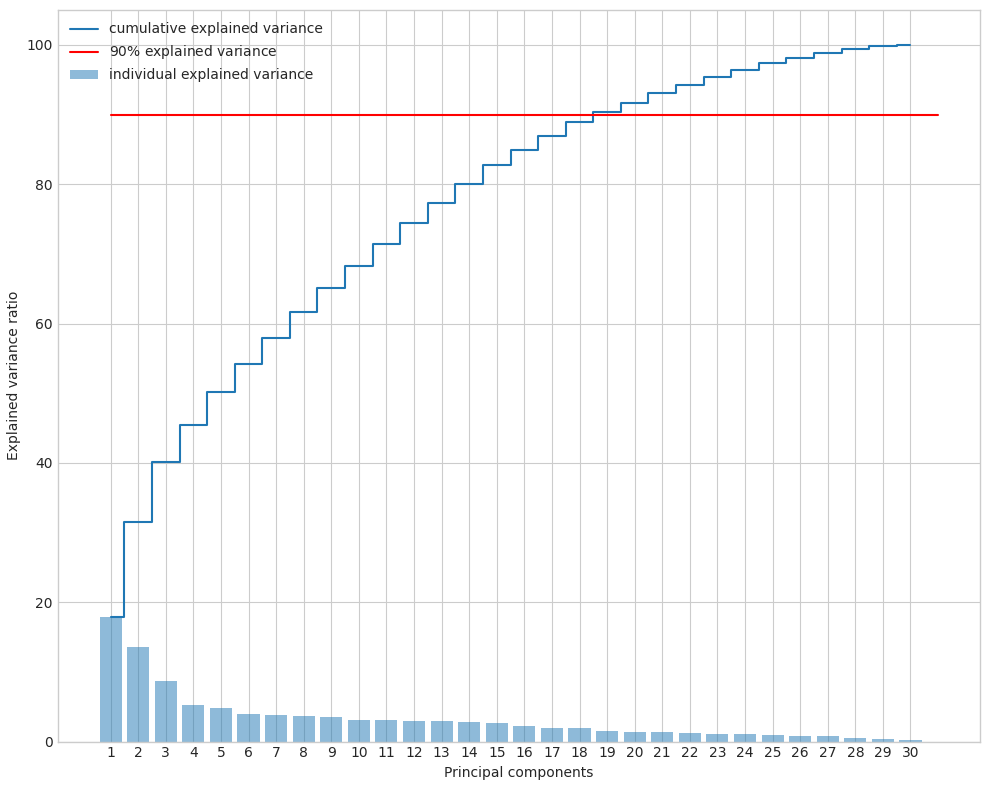

In [14]:
from mlxtend.preprocessing import standardize
from mlxtend.feature_extraction import PrincipalComponentAnalysis

X_standard = standardize(X)

pca = PrincipalComponentAnalysis(n_components=None)
pca.fit(X_standard)
X_pca = pca.transform(X_standard)

tot = sum(pca.e_vals_)
var_exp = [(i / tot)*100 for i in sorted(pca.e_vals_, reverse=True)]
cum_var_exp = np.cumsum(pca.e_vals_normalized_*100)

with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(range(30))
    ax.set_xticklabels(np.arange(1, X.shape[1] + 1))
    plt.plot([0, 30], [90, 90], color='red', label="$90\%$ explained variance")
    plt.legend(loc='best')
    plt.tight_layout()

To achieve the same effect as wrapper feature selection and IG selection (i.e. dimensionality reduction) we take the first 19 principal components - they explain more than 90% of total variability within the data.

In [15]:
pca = PrincipalComponentAnalysis(n_components=19)
pca.fit(X_standard)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

optimal_features_data["pca train"] = X_train_pca
optimal_features_data["pca test"] = X_test_pca

<Figure size 600x400 with 0 Axes>

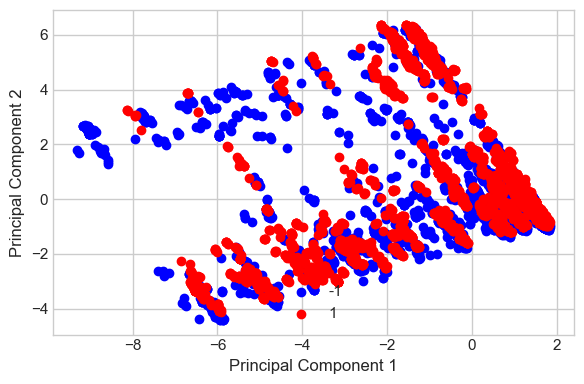

In [40]:
pca = PrincipalComponentAnalysis(n_components=2)
pca.fit(X_standard)
x_pca_all = pca.transform(X_standard)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab, col in zip((-1, 1), ('blue', 'red')):
        plt.scatter(x_pca_all.loc[y==lab, 0], x_pca_all.loc[y==lab, 1], label=lab, c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# IG

Custom implementation of the Information Gain feature selector. We discard all features that have 0 mutual gain with the target variable.

In [16]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class MutualGainFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self):
      self.zero_gain_features_ = None
    
    def fit(self, X, y):
      # Calculate information gain for each feature
      mutual_info = mutual_info_classif(X, y, discrete_features=True)
      info_gains = dict()
      for feature, gain in zip(X.columns, mutual_info):
          info_gains[feature] = gain
    
      # Identify features with zero information gain
      self.zero_gain_features_ = [feature for feature, gain in info_gains.items() if gain == 0.0]
    
      return self
  
    def transform(self, X):
      # Drop features with zero information gain
      return X.drop(columns=self.zero_gain_features_)

In [17]:
MGFS = MutualGainFeatureSelector()
MGFS.fit(X_train, y_train)
X_train_mgfs = MGFS.transform(X_train)
X_test_mgfs = MGFS.transform(X_test)

enc = OrdinalEncoder()
enc.fit(X_train_mgfs)
X_train_ordinal_mgfs = enc.transform(X_train_mgfs)
X_test_ordinal_mgfs = enc.transform(X_test_mgfs)

optimal_features_data["mgfs train"] = X_train_mgfs
optimal_features_data["mgfs test"] = X_test_mgfs
optimal_features_data["mgfs train ordinal"] = X_train_ordinal_mgfs
optimal_features_data["mgfs test ordinal"] = X_test_ordinal_mgfs

# Chosen metrics calculations

In [56]:
CLASSIFIERS = [MLPClassifier, SVC, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier]
CLF_INTERNAL_NAMES = ["MLPC", "SVC", "DT", "KNN", "RF"]
CLF_PARAMETERS = dict()
CLF_PARAMETERS["MLPC"] = {"hidden_layer_sizes":(100,), "learning_rate_init":0.01}
CLF_PARAMETERS["SVC"] = {"C":3}
CLF_PARAMETERS["DT"] = {}
CLF_PARAMETERS["KNN"] = {"n_neighbors":7, "metric":"cityblock"}
CLF_PARAMETERS["RF"] = {}

MEASURES = [correct_classification_rate, true_positive_rate, true_negative_rate, geometric_mean]
MEASURE_NAMES = ["CCR", "TPR", "TNR", "GM"]

results = dict()

results["Classifier"] = list()
results["Measure"] = list()
results["Feature selection technique"] = list()
results["Value"] = list()

for clf, internal_name in zip(CLASSIFIERS, CLF_INTERNAL_NAMES):
    train_sets = [X_train]
    test_sets = [X_test]
    feature_selection_techniques = ["No feature selection"]
    
    train_sets.append(optimal_features_data["sfs train " + internal_name])
    test_sets.append(optimal_features_data["sfs test " + internal_name])
    feature_selection_techniques.append("Wrapper")
    
    train_sets.append(optimal_features_data["pca train"])
    test_sets.append(optimal_features_data["pca test"])
    feature_selection_techniques.append("PCA")
    
    train_sets.append(optimal_features_data["mgfs train"])
    test_sets.append(optimal_features_data["mgfs test"])
    feature_selection_techniques.append("IG")
    
    for train, test, feature_selection_name in zip(train_sets, test_sets, feature_selection_techniques):
        c = clf(**CLF_PARAMETERS[internal_name])
        c.fit(train, y_train)
        
        for measure_func, measure_name in zip(MEASURES, MEASURE_NAMES):
            measure_value = measure_func(c, test, y_test.reset_index(drop=True))
            
            results["Classifier"].append(str(clf()))
            results["Measure"].append(measure_name)
            results["Feature selection technique"].append(feature_selection_name)
            results["Value"].append(measure_value)
            
# Separately for NB
nowrap_train = X_train_ordinal
nowrap_test = X_test_ordinal

clf = CategoricalNB()
clf.fit(nowrap_train, y_train)
for measure_func, measure_name in zip(MEASURES, MEASURE_NAMES):
    measure_value = measure_func(clf, nowrap_test, y_test.reset_index(drop=True))
    
    results["Classifier"].append("Naive Bayes")
    results["Measure"].append(measure_name)
    results["Feature selection technique"].append("No feature selection")
    results["Value"].append(measure_value)
    
    
wrapper_train = optimal_features_data["sfs train NaiveBayes"]
wrapper_test = optimal_features_data["sfs test NaiveBayes"]

clf = CategoricalNB()
clf.fit(wrapper_train, y_train)
for measure_func, measure_name in zip(MEASURES, MEASURE_NAMES):
    measure_value = measure_func(clf, wrapper_test, y_test.reset_index(drop=True))
    
    results["Classifier"].append("Naive Bayes")
    results["Measure"].append(measure_name)
    results["Feature selection technique"].append("Wrapper")
    results["Value"].append(measure_value)
    

pca_train = optimal_features_data["pca train"]
pca_test = optimal_features_data["pca test"]

clf = GaussianNB()
clf.fit(pca_train, y_train)
for measure_func, measure_name in zip(MEASURES, MEASURE_NAMES):
    measure_value = measure_func(clf, pca_test, y_test.reset_index(drop=True))
    
    results["Classifier"].append("Naive Bayes")
    results["Measure"].append(measure_name)
    results["Feature selection technique"].append("PCA")
    results["Value"].append(measure_value)
    
    
ig_train = optimal_features_data["mgfs train ordinal"]
ig_test = optimal_features_data["mgfs test ordinal"]

clf = CategoricalNB()
clf.fit(ig_train, y_train)
for measure_func, measure_name in zip(MEASURES, MEASURE_NAMES):
    measure_value = measure_func(clf, ig_test, y_test.reset_index(drop=True))
    
    results["Classifier"].append("Naive Bayes")
    results["Measure"].append(measure_name)
    results["Feature selection technique"].append("IG")
    results["Value"].append(measure_value)

In [57]:
results = pd.DataFrame.from_dict(results)
results["Rounded value"] = np.round(results["Value"], 3)
results["Percentage"] = results["Rounded value"] * 100
results

,Classifier,Measure,Feature selection technique,Value,Rounded value,Percentage
0,MLPClassifier(),CCR,No feature selection,0.962008,0.962,96.2
1,MLPClassifier(),TPR,No feature selection,0.972559,0.973,97.3
2,MLPClassifier(),TNR,No feature selection,0.948560,0.949,94.9
3,MLPClassifier(),GM,No feature selection,0.960484,0.960,96.0
4,MLPClassifier(),CCR,Wrapper,0.965626,0.966,96.6
...,...,...,...,...,...,...
91,Naive Bayes,GM,PCA,0.894017,0.894,89.4
92,Naive Bayes,CCR,IG,0.919493,0.919,91.9
93,Naive Bayes,TPR,IG,0.946731,0.947,94.7
94,Naive Bayes,TNR,IG,0.884774,0.885,88.5


In [58]:
results.to_excel("metrics_data.xlsx")

# Metrics visualizations

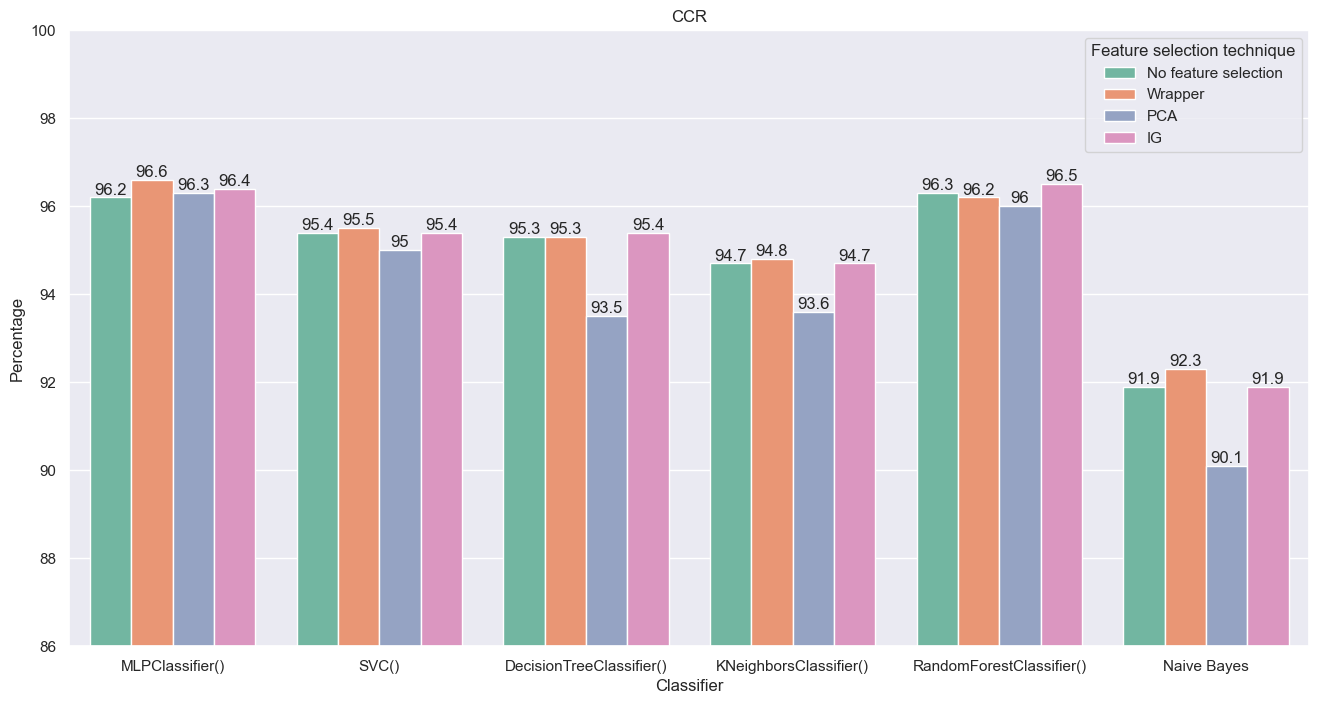

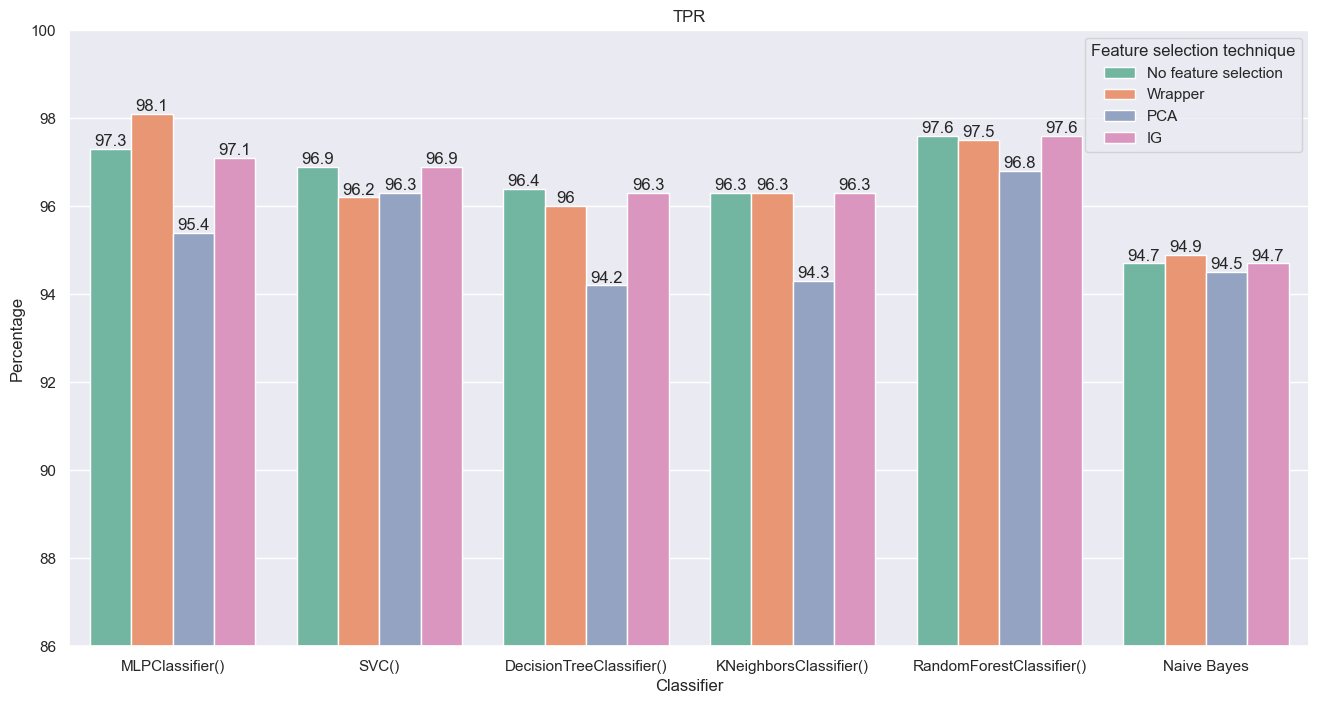

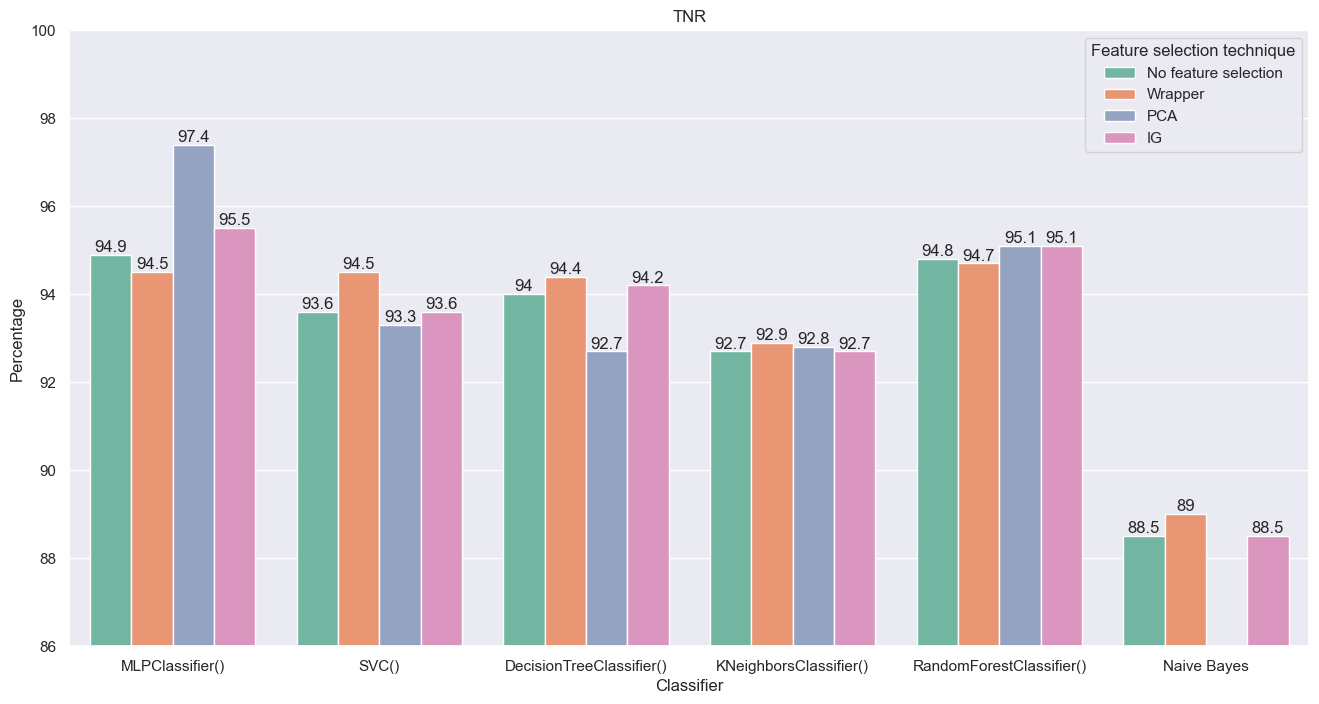

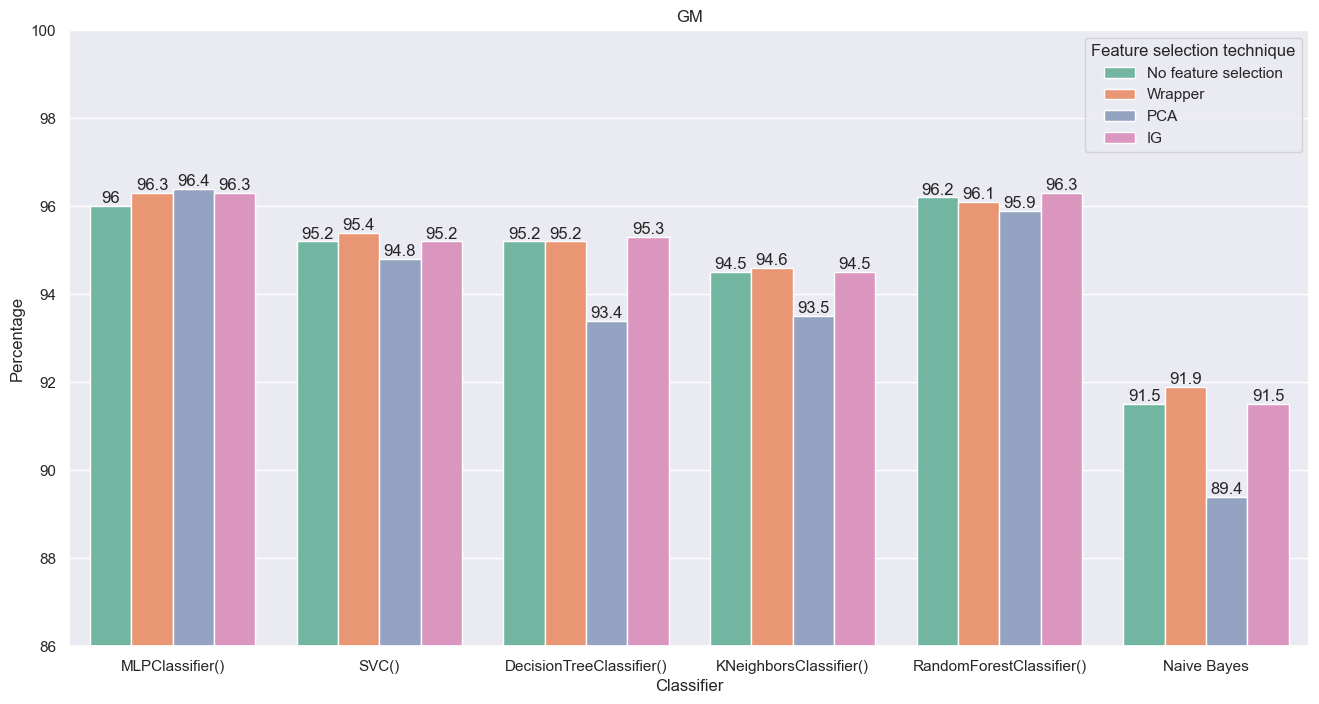

In [59]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 8)})

for measure_name in MEASURE_NAMES:
    ax = sns.barplot(data=results[results["Measure"]==measure_name], x="Classifier", y="Percentage", hue="Feature selection technique", palette=sns.color_palette("Set2"))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(measure_name)
    plt.ylim((86, 100))
    plt.savefig(measure_name)
    plt.show()

# Other visualizations

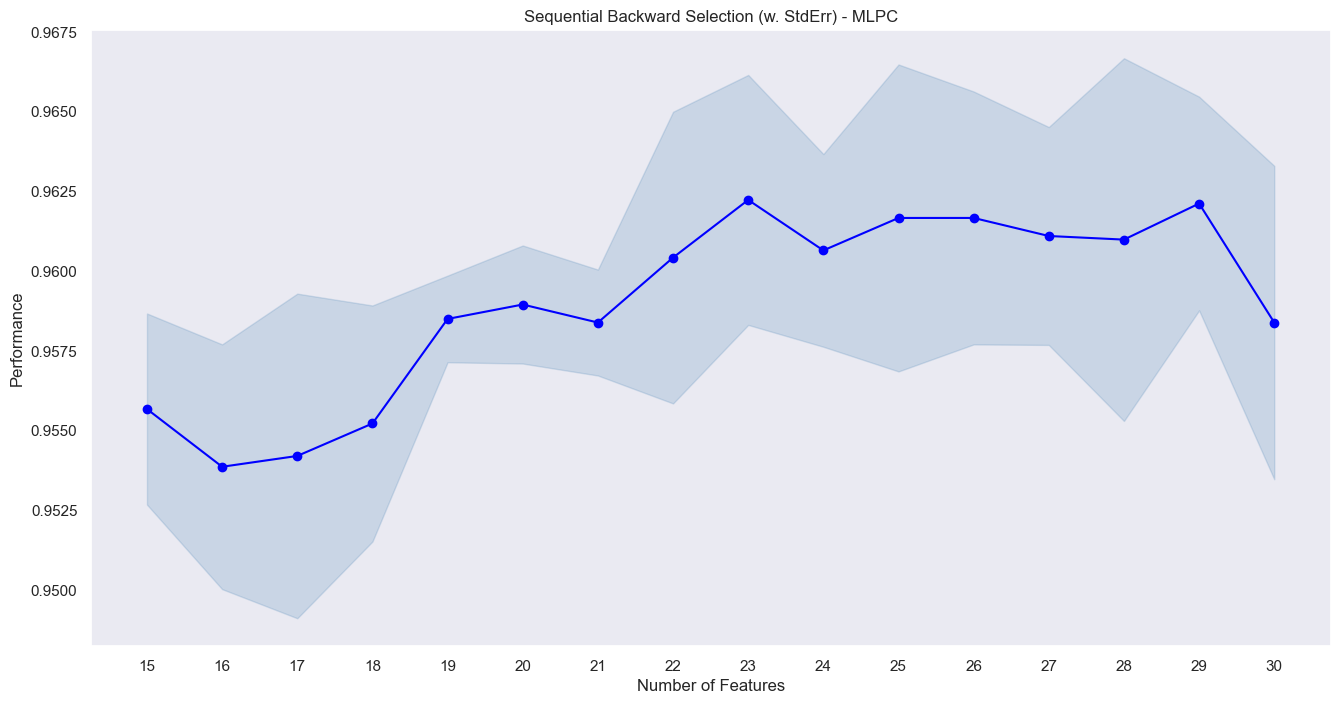

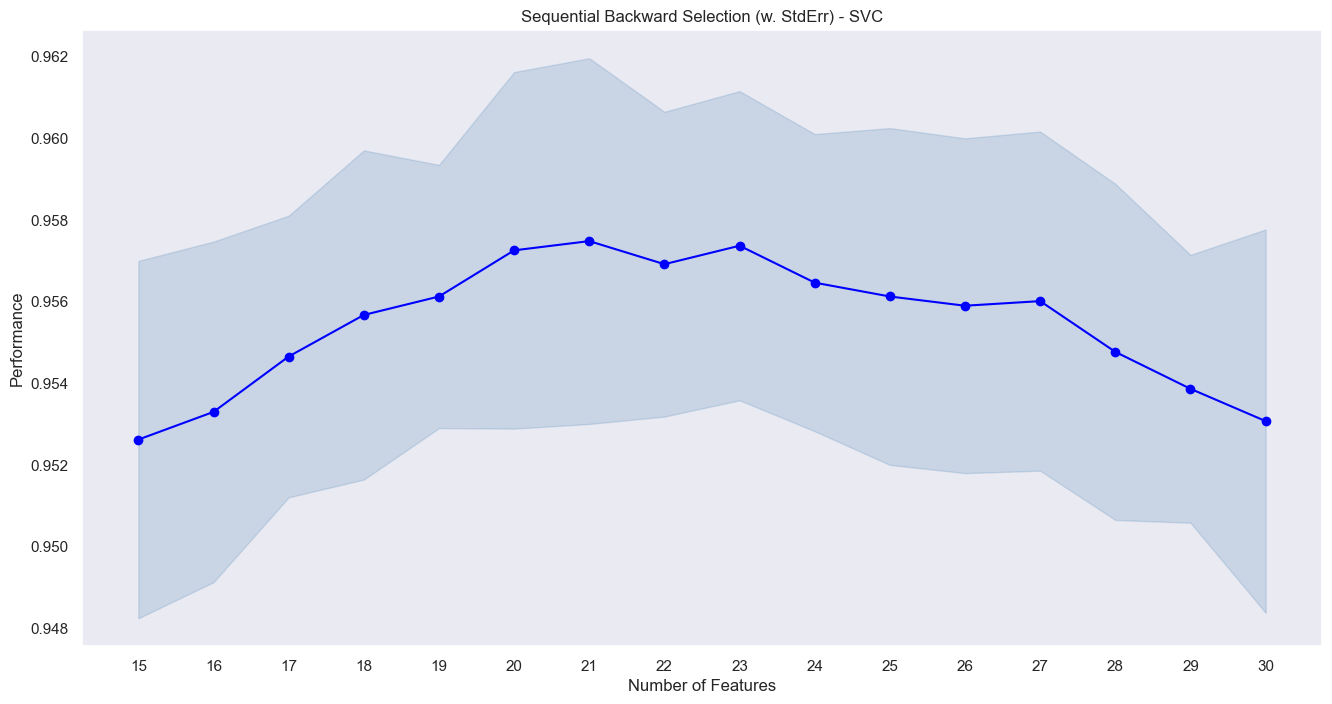

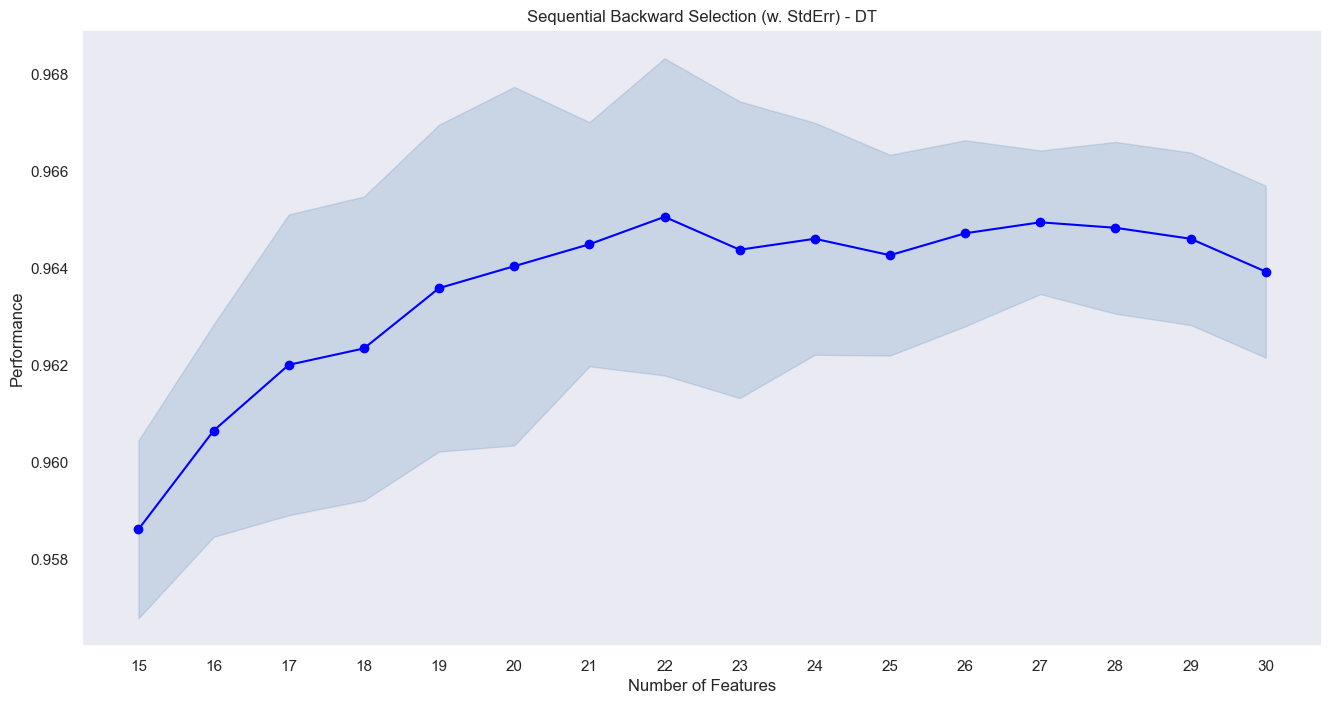

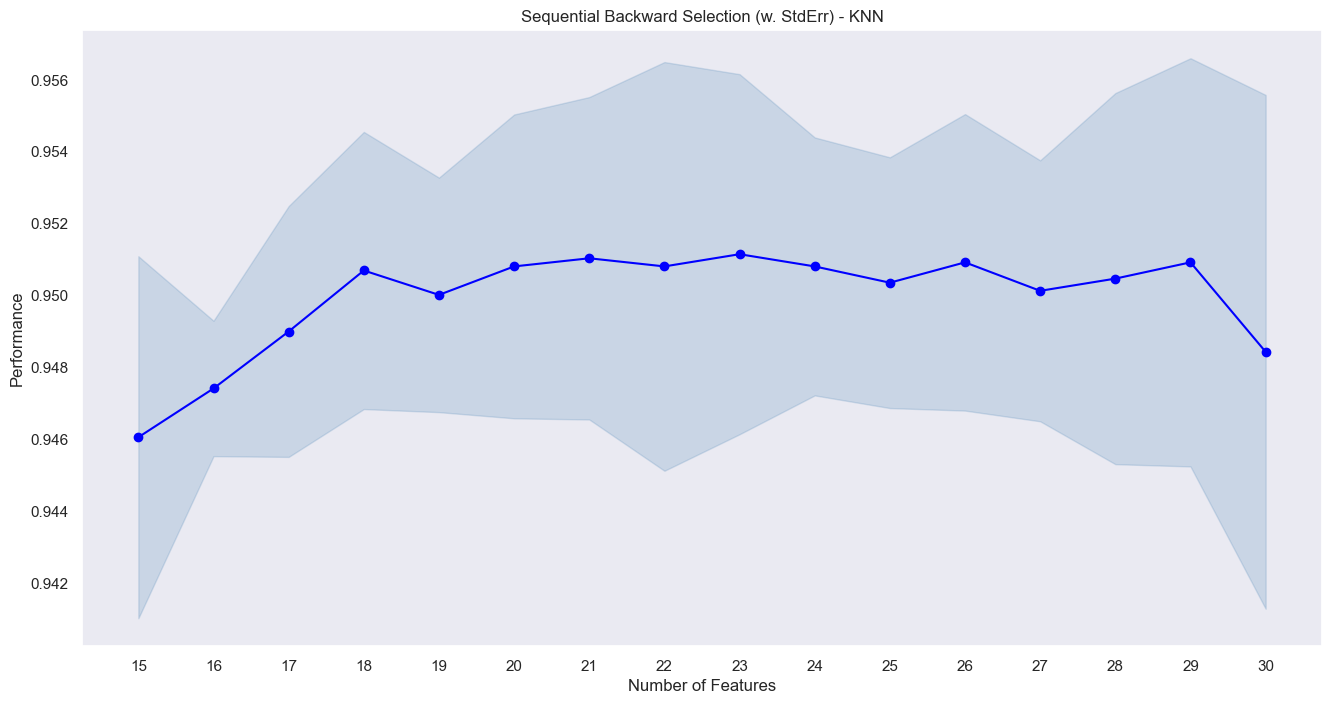

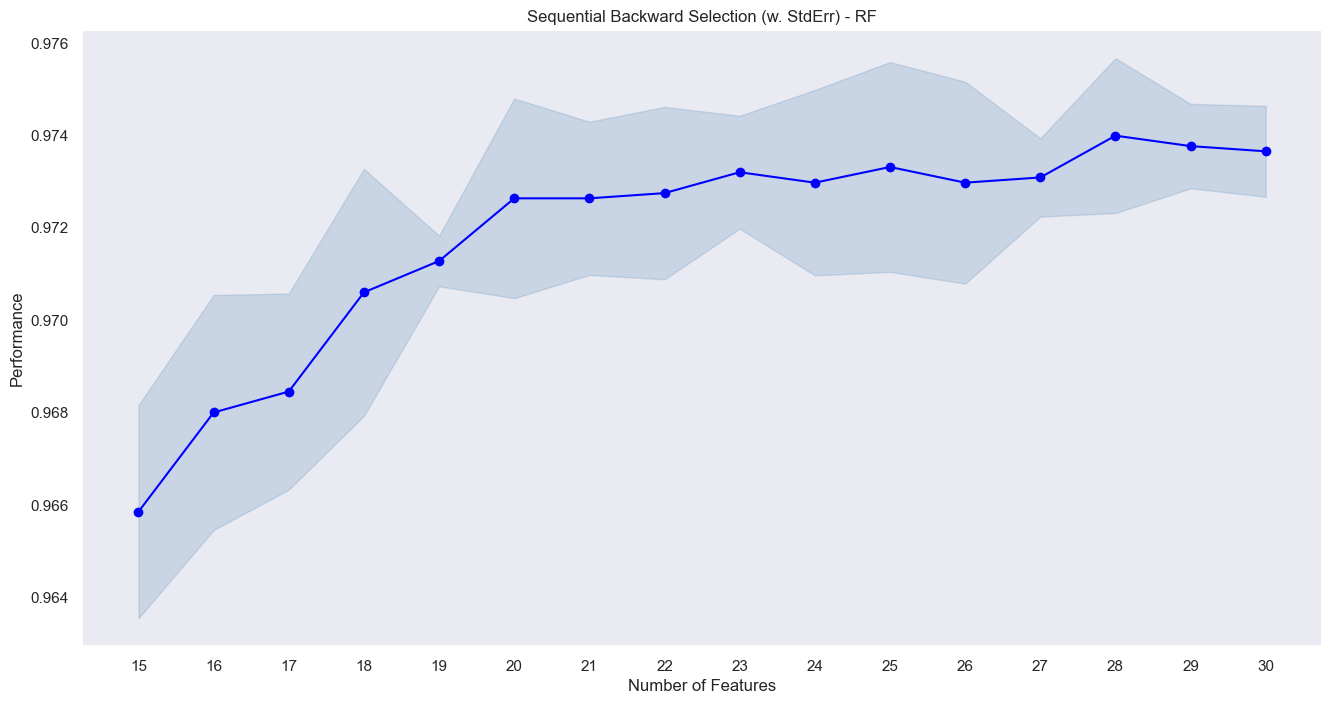

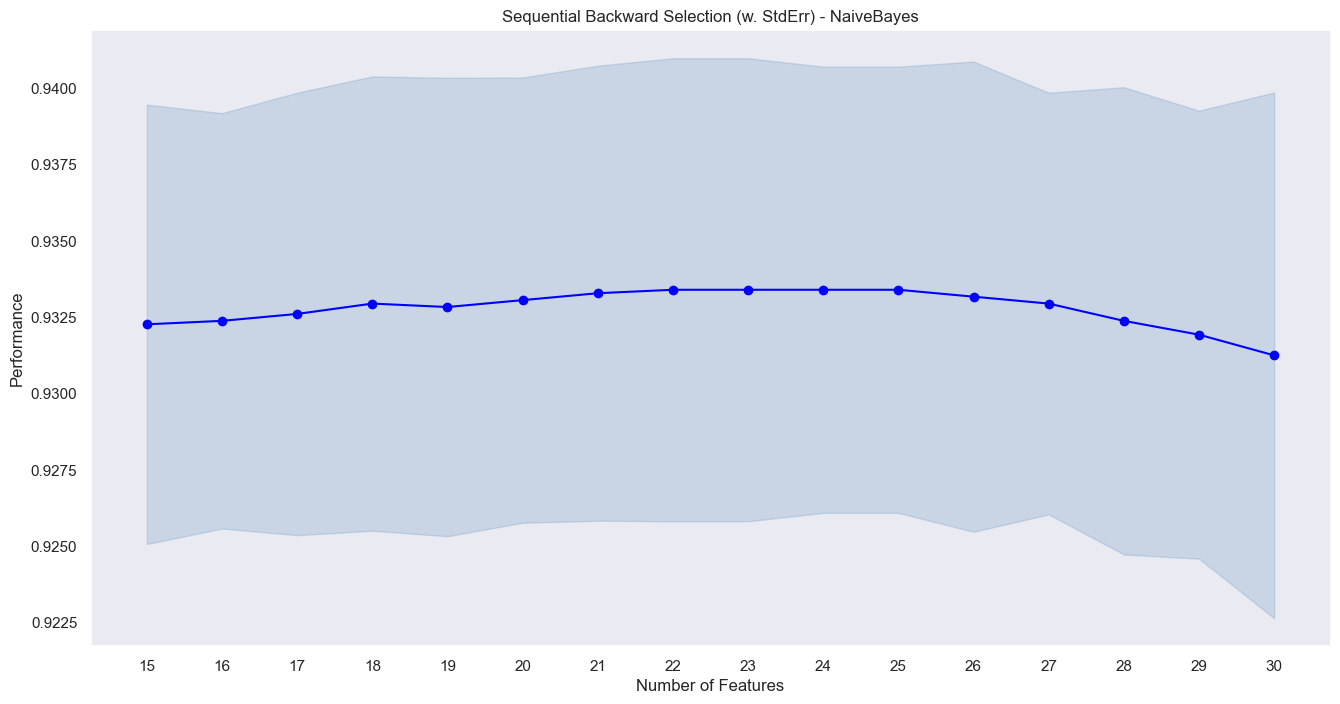

In [50]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
for classifier in CLF_INTERNAL_NAMES + ["NaiveBayes"]:
    plot_sfs(optimal_features_data["sfs instance " + classifier].get_metric_dict(), kind='std_dev')
    plt.title(f"Sequential Backward Selection (w. StdErr) - {classifier}")
    plt.grid()
    plt.show()